In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import pandas as pd
from googleapiclient.discovery import build
from config.config import YOUTUBE_API_KEY
from api_methods import fetch_channel_stats, fetch_video_ids, fetch_video_details

In [120]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey = YOUTUBE_API_KEY)

In [121]:
# Channels to analyze
channel_ids = [
    "UC6OI7Crv96jgra5pwJNDFRQ", #Channel's name Sezen Aksu
    # Can add more channels
]

In [122]:
channel_stats = fetch_channel_stats(youtube, channel_ids)

In [123]:
channel_stats

channelName subscribers       views totalVideos                playlistId
0  Sezen Aksu     2570000  2826053191         748  UU6OI7Crv96jgra5pwJNDFRQ

In [124]:
channel_stats.loc

In [125]:
playlist_id = channel_stats.loc[channel_stats['channelName']== "Sezen Aksu", "playlistId"].iloc[0]

In [126]:
video_ids = fetch_video_ids(youtube, playlist_id)  # belirli bir √ßalma listesine ait video id √ßekme i≈ülemi ger√ßekle≈ütirilecektir.

In [127]:
# Kanala ait video sayƒ±sƒ±
len(video_ids)

749

# Kanala ait videolarƒ±n detaylarƒ±

In [128]:
video_details = fetch_video_details(youtube, video_ids)

In [129]:
video_details.head(n=1)

video_id channelTitle  \
0  SwFG0k9ezHg   Sezen Aksu   

                                               title  \
0  Sezen Aksu - Gidiyorum #SezenAksu #MinikSer√ße ...   

                                         description  \
0  =============================\r\n\r\nSezen Aks...   

                                                tags           publishedAt  \
0  [sezen aksu, Turkish music, Turkish Pop Music,...  2023-12-03T17:00:17Z   

  viewCount likeCount favouriteCount commentCount duration definition caption  
0     22711      1351           None           40    PT49S         hd   false

En √ßok izlenme alan video'ya ait satƒ±rƒ± bulmaya √ßalƒ±≈üalƒ±m.

√ñncelikle Null deƒüer var mƒ± yok mu kontrol edelim

In [130]:
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [131]:
# NaN deƒüerleri 0 sayƒ±sƒ± ile doldurma
fill_value = 0
video_details.fillna(fill_value, inplace=True)

In [132]:
# Kontrol edelim 
video_details.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount    False
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [133]:
video_details.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount     int64
commentCount      object
duration          object
definition        object
caption           object
dtype: object

Kanal'ƒ±n en √ßok izlenen videolarƒ±nƒ± inceleyelim.

In [134]:
# En √ßok izlenen videoya ait satƒ±rƒ± bulma
most_viewed = video_details.loc[video_details['viewCount'].astype(float).idxmax()]

# En √ßok izlenen videoya ait bilgiler
most_viewed_video_info = most_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# most_viewed_video_info deƒüi≈ükeni artƒ±k en √ßok izlenen videoya ait t√ºm bilgileri i√ßerir
most_viewed_video_df = pd.DataFrame([most_viewed_video_info])
most_viewed_video_df.head()

video_id channelTitle  \
68  p4yxn8ZahPI   Sezen Aksu   

                                                title  \
68  Sezen Aksu - Ben De Yoluma Giderim (Official V...   

                                          description  \
68  "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   

                                                 tags           publishedAt  \
68  [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   

    viewCount likeCount  favouriteCount commentCount duration definition  \
68  124594641    646932               0        49330  PT3M44S         hd   

   caption  
68    true

In [135]:
# 'viewCount' s√ºtununu sayƒ±sal veri t√ºr√ºne d√∂n√º≈üt√ºr
video_details['viewCount'] = pd.to_numeric(video_details['viewCount'], errors='coerce')

# NaN deƒüerleri temizle
video_details = video_details.dropna(subset=['viewCount'])

# 'viewCount' s√ºtununa g√∂re DataFrame'i sƒ±rala ve en √ßok izlenen 10 videoyu se√ß
top_10_viewed = video_details.nlargest(10, 'viewCount')

# En √ßok izlenen 10 videoya ait bilgiler
top_10_viewed_video_info = top_10_viewed[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info deƒüi≈ükeni artƒ±k en √ßok izlenen 10 videoya ait t√ºm bilgileri i√ßerir
top_10_viewed_video_df = pd.DataFrame(top_10_viewed_video_info)
top_10_viewed_video_df.head(10)

video_id channelTitle  \
68   p4yxn8ZahPI   Sezen Aksu   
235  D-i77gTIEWM   Sezen Aksu   
318  Eg6gKLXA30U   Sezen Aksu   
213  6ywcf07KQZA   Sezen Aksu   
349  352QSI4nsQk   Sezen Aksu   
247  -aW8x1jTA2U   Sezen Aksu   
139  nUhlsec8uhs   Sezen Aksu   
69   uVaG7dvT91s   Sezen Aksu   
205  TGHOcyiZrDs   Sezen Aksu   
440  LYDOlK-wSX0   Sezen Aksu   

                                                 title  \
68   Sezen Aksu - Ben De Yoluma Giderim (Official V...   
235  Sezen Aksu - ƒ∞hanetten Geri Kalan (Official Au...   
318          Sezen Aksu - T√ºkeneceƒüiz (Official Audio)   
213            Sezen Aksu - Manifesto (Official Video)   
349         Sezen Aksu - Ka√ßƒ±n Kurasƒ± (Official Audio)   
247           Sezen Aksu - Biliyorsun (Official Audio)   
139                      Sezen Aksu - Yansƒ±n IÃástanbul   
69   Sezen Aksu - Yetinmeyi Bilir Misin? (Official ...   
205   Sezen Aksu - VazgecÃßtim (Lyrics | ≈ûarkƒ± S√∂zleri)   
440               Sezen Aksu - Rakkas (Official Audio)   

                                           description  \
68   "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   
235  Biraz Pop Biraz Sezen - ƒ∞hanetten Geri Kalan \...   
318  Sezen Aksu - T√ºkeneceƒüiz\n\nS√∂z: Sezen Aksu\nB...   
213  Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...   
349  S√∂z: Sezen Aksu\nBeste: Sezen Aksu\nD√ºzenleme:...   
247  Hayat bazen √∂yle insafsƒ±z ki \nK√º√ß√ºk bir bo≈ülu...   
139  ‚ÄúYansƒ±n ƒ∞stanbul‚Äù daha √∂nce R√ºmeysa tarafƒ±ndan...   
69   "Bu ≈üarkƒ±nƒ±n bestecisi Serkan ƒ∞zzet √ñzdoƒüan. A...   
205  Sezen Aksu - VazgecÃßtim\n\nLyrics: Sezen Aksu\...   
440  "Rakkas" (I≈üƒ±k Doƒüudan Y√ºkselir - 1995)\n\nS√∂z...   

                                                  tags           publishedAt  \
68   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   
235  [sezen aksu, YENƒ∞ ALB√úM, SEZEN AKSU YENƒ∞, SEZE...  2017-01-23T18:45:19Z   
318  [sezen aksu, sezen aksu t√ºkeneceƒüiz, t√ºkeneceƒü...  2016-12-25T21:23:03Z   
213  [sezen aksu, manifesto, sezen aksu manifesto, ...  2017-05-27T08:00:20Z   
349  [sezen aksu, g√∂n√ºl g√∂z√ºm kapalƒ± bilerek sana y...  2016-12-20T08:09:09Z   
247  [sezen aksu, Biliyorsun, Aƒülamak G√ºzeldir, Sez...  2016-12-26T06:29:53Z   
139  [sezen aksu, Turkish music, Turkish Pop Music,...  2018-08-07T07:15:23Z   
69   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-01-16T21:00:04Z   
205  [sezen aksu, Turkish music, Turkish Pop Music,...  2017-07-12T08:00:39Z   
440  [sezen aksu ƒ±≈üƒ±k doƒüudan y√ºkselir, sezen aksu,...  2016-10-26T14:32:45Z   

     viewCount likeCount  favouriteCount commentCount duration definition  \
68   124594641    646932               0        49330  PT3M44S         hd   
235   85832833    341229               0        17373  PT3M57S         hd   
318   73335695    273123               0        14558  PT4M20S         hd   
213   66719979    337055               0        30943  PT3M31S         hd   
349   65951377    297969               0        17149  PT3M46S         hd   
247   65624963    301094               0        12397  PT5M17S         hd   
139   60940156    204035               0         4916  PT3M53S         hd   
69    58510313    450320               0        19802  PT2M59S         hd   
205   57382966    221455               0        28791   PT5M1S         hd   
440   55215407    152455               0         2023  PT3M44S         hd   

    caption  
68     true  
235   false  
318    true  
213    true  
349    true  
247   false  
139    true  
69     true  
205   false  
440    true

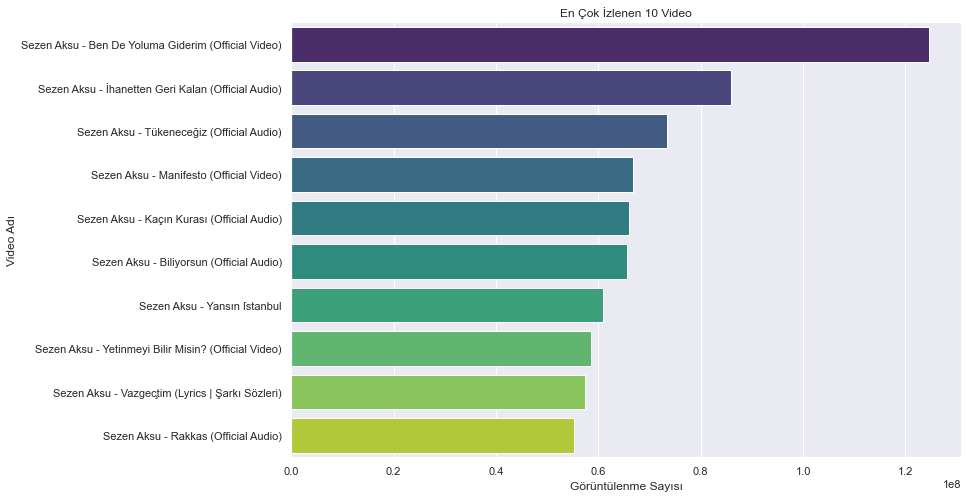

In [136]:
# En √ßok izlenen 10 videoya ait DataFrame'i kullanarak √ßubuk grafik olu≈üturalƒ±m
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_viewed_video_df, palette='viridis')

plt.xlabel("G√∂r√ºnt√ºlenme Sayƒ±sƒ±")
plt.ylabel("Video Adƒ±")
plt.title("En √áok ƒ∞zlenen 10 Video")
plt.show()

Kanal'ƒ±n en √ßok beƒüeni alan videolarƒ±

In [137]:
most_liked = video_details.loc[video_details['likeCount'].astype(float).idxmax()]

In [138]:
most_liked_video_info = most_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

In [139]:
most_liked_video_df = pd.DataFrame([most_liked_video_info])
most_liked_video_df.head()

video_id channelTitle  \
68  p4yxn8ZahPI   Sezen Aksu   

                                                title  \
68  Sezen Aksu - Ben De Yoluma Giderim (Official V...   

                                          description  \
68  "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   

                                                 tags           publishedAt  \
68  [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   

    viewCount likeCount  favouriteCount commentCount duration definition  \
68  124594641    646932               0        49330  PT3M44S         hd   

   caption  
68    true

In [140]:
# 'likeCount' s√ºtununu sayƒ±sal veri t√ºr√ºne d√∂n√º≈üt√ºrelim
video_details['likeCount'] = pd.to_numeric(video_details['likeCount'], errors='coerce')

# NaN deƒüerleri temizle
video_details = video_details.dropna(subset=['likeCount'])

# 'likeCount' s√ºtununa g√∂re DataFrame'i sƒ±rala ve en √ßok izlenen 10 videoyu se√ß
top_10_liked = video_details.nlargest(10, 'likeCount')

# En √ßok beƒüenilen 10 videoya ait bilgiler
top_10_liked_video_info = top_10_liked[['video_id','channelTitle', 'title', 'description', 'tags', 'publishedAt',
                                           'viewCount', 'likeCount', 'favouriteCount', 'commentCount',
                                           'duration', 'definition', 'caption']]

# top_10_viewed_video_info deƒüi≈ükeni artƒ±k en √ßok beƒüenilen 10 videoya ait t√ºm bilgileri i√ßerir
top_10_liked_video_df = pd.DataFrame(top_10_liked_video_info)
top_10_liked_video_df.head(5)

video_id channelTitle  \
68   p4yxn8ZahPI   Sezen Aksu   
69   uVaG7dvT91s   Sezen Aksu   
235  D-i77gTIEWM   Sezen Aksu   
213  6ywcf07KQZA   Sezen Aksu   
247  -aW8x1jTA2U   Sezen Aksu   

                                                 title  \
68   Sezen Aksu - Ben De Yoluma Giderim (Official V...   
69   Sezen Aksu - Yetinmeyi Bilir Misin? (Official ...   
235  Sezen Aksu - ƒ∞hanetten Geri Kalan (Official Au...   
213            Sezen Aksu - Manifesto (Official Video)   
247           Sezen Aksu - Biliyorsun (Official Audio)   

                                           description  \
68   "Bu haftaki √ßalƒ±≈ümamƒ±z, fƒ±rƒ±ndan √ßƒ±ktƒ±ktan son...   
69   "Bu ≈üarkƒ±nƒ±n bestecisi Serkan ƒ∞zzet √ñzdoƒüan. A...   
235  Biraz Pop Biraz Sezen - ƒ∞hanetten Geri Kalan \...   
213  Manifesto (Biraz Pop Biraz Sezen, 2017) \n\n#l...   
247  Hayat bazen √∂yle insafsƒ±z ki \nK√º√ß√ºk bir bo≈ülu...   

                                                  tags           publishedAt  \
68   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-02-20T20:30:04Z   
69   [sezen aksu, Turkish music, Turkish Pop Music,...  2020-01-16T21:00:04Z   
235  [sezen aksu, YENƒ∞ ALB√úM, SEZEN AKSU YENƒ∞, SEZE...  2017-01-23T18:45:19Z   
213  [sezen aksu, manifesto, sezen aksu manifesto, ...  2017-05-27T08:00:20Z   
247  [sezen aksu, Biliyorsun, Aƒülamak G√ºzeldir, Sez...  2016-12-26T06:29:53Z   

     viewCount  likeCount  favouriteCount commentCount duration definition  \
68   124594641     646932               0        49330  PT3M44S         hd   
69    58510313     450320               0        19802  PT2M59S         hd   
235   85832833     341229               0        17373  PT3M57S         hd   
213   66719979     337055               0        30943  PT3M31S         hd   
247   65624963     301094               0        12397  PT5M17S         hd   

    caption  
68     true  
69     true  
235   false  
213    true  
247   false

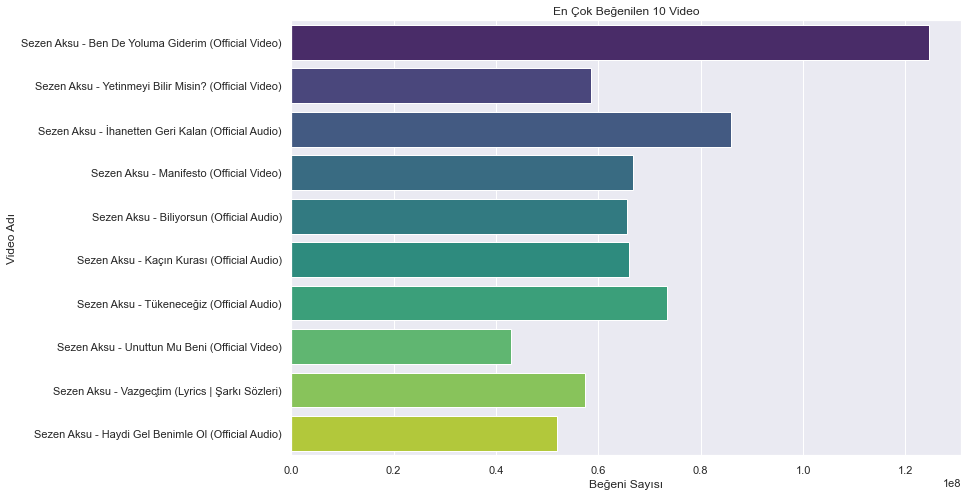

In [141]:
# En √ßok beƒüenilen 10 videoya ait DataFrame'i kullanarak √ßubuk grafik olu≈ütur
sns.set(rc={'figure.figsize': (12, 8)})
sns.barplot(x='viewCount', y='title', data=top_10_liked_video_df, palette='viridis')

# Grafik √ºzerine eklemeler
plt.xlabel("Beƒüeni Sayƒ±sƒ±")
plt.ylabel("Video Adƒ±")
plt.title("En √áok Beƒüenilen 10 Video")
plt.show()

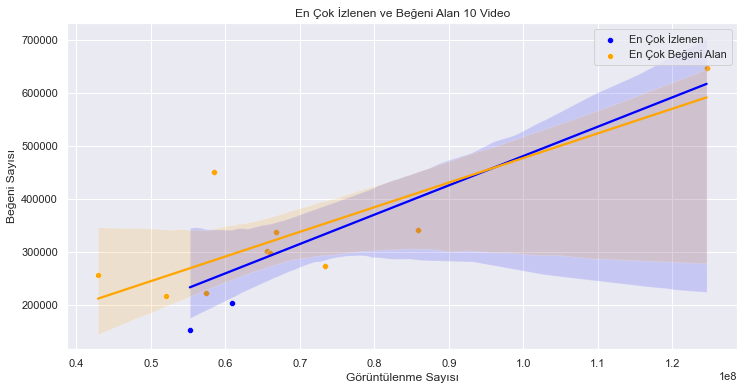

In [142]:
# En √ßok beƒüeni alan ve en √ßok izlenen 10 videoyu se√ß
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# √áift y√∂nl√º scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_views, color='blue', label='En √áok ƒ∞zlenen')
sns.scatterplot(x='viewCount', y='likeCount', data=top_10_likes, color='orange', label='En √áok Beƒüeni Alan')

# Regresyon √ßizgisi ekle
sns.regplot(x='viewCount', y='likeCount', data=top_10_views, scatter=False, color='blue')
sns.regplot(x='viewCount', y='likeCount', data=top_10_likes, scatter=False, color='orange')

# Grafik √ºzerine eklemeler
plt.xlabel('G√∂r√ºnt√ºlenme Sayƒ±sƒ±')
plt.ylabel('Beƒüeni Sayƒ±sƒ±')
plt.title('En √áok ƒ∞zlenen ve Beƒüeni Alan 10 Video')
plt.legend()
plt.show()

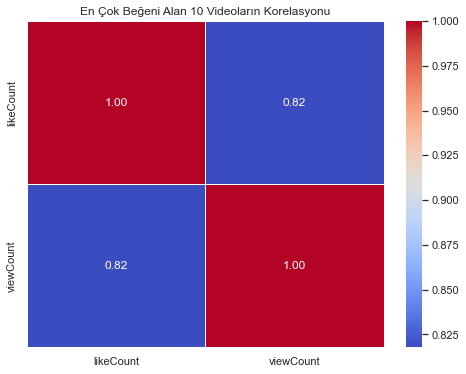

In [143]:
# En √ßok beƒüeni alan ve en √ßok izlenen 10 videoyu se√ßelim.
top_10_likes = video_details.nlargest(10, 'likeCount')
top_10_views = video_details.nlargest(10, 'viewCount')

# Se√ßilen video'nun 'likeCount' ve 'viewCount' deƒüi≈ükenleri arasƒ±ndaki korelasyonu hesapla.
correlation_matrix_likes = top_10_likes[['likeCount', 'viewCount']].corr()

# Se√ßilen video'nun 'likeCount' ve 'viewCount' deƒüi≈ükenleri i√ßin a ƒ±sƒ± haritasƒ± uygulama.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_likes, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('En √áok Beƒüeni Alan 10 Videolarƒ±n Korelasyonu')
plt.show()

Yorum : Beƒüeni sayƒ±sƒ± ve izlenme sayƒ±sƒ± arasƒ±nda ki korelasyon katsayƒ±sƒ± aralarƒ±nda g√º√ßl√º bir ili≈üki olduƒüunu g√∂sterir.

In [144]:
# En √ßok izlenen videoya ait ID'yi liste i√ßine eklemek
most_viewed_video_id = most_viewed['video_id']
print(most_viewed_video_id)

p4yxn8ZahPI


In [145]:
# Video istatistiklerini almak i√ßin API isteƒüi olu≈üturalƒ±m.
request = youtube.videos().list(
    part="snippet,statistics",
    id= most_viewed_video_id
)
response = request.execute()

In [146]:
video_info = response['items'][0]
title = video_info['snippet']['title']
published_at = video_info['snippet']['publishedAt']
view_count = video_info['statistics']['viewCount']
like_count = video_info['statistics']['likeCount']
favorite_count = video_info['statistics']['favoriteCount']
comment_count = video_info['statistics']['commentCount']

# Verileri DataFrame'e √ßevirme
data = {
    "Video Adƒ±": [title],
    "Yayƒ±n Tarihi": [published_at],
    "G√∂r√ºnt√ºlenme Sayƒ±sƒ±": [view_count],
    "Beƒüeni Sayƒ±sƒ±": [like_count],
    "Favorilere Ekleme Sayƒ±sƒ±": [favorite_count],
    "Yorum Sayƒ±sƒ±": [comment_count]
}

video_df = pd.DataFrame(data)

In [147]:
video_df.head()

Video Adƒ±          Yayƒ±n Tarihi  \
0  Sezen Aksu - Ben De Yoluma Giderim (Official V...  2020-02-20T20:30:04Z   

  G√∂r√ºnt√ºlenme Sayƒ±sƒ± Beƒüeni Sayƒ±sƒ± Favorilere Ekleme Sayƒ±sƒ± Yorum Sayƒ±sƒ±  
0           124594641        646932                        0        49330

# Video hakkƒ±nda yapƒ±lan yorumlarƒ± inceliyoruz.

In [148]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

In [149]:
request = youtube.commentThreads().list(
    part='snippet',
    videoId= most_viewed_video_id,
    maxResults=100  # maximum 100 yorum alabiliyoruz
)
response = request.execute()

comment = [item['snippet']['topLevelComment']['snippet']['textDisplay'] for item in response['items']]
for item in comment:
    print(item)

ben de yoluma giderim artƒ±k :(
Ezdirmem kendimii
Bence hayatan daha √ßok insanlar √ºz√ºyorlar üòîüòî
Insanlarin agzindan cikan sozlerine inanmayin ! √á√ºnk√º  o sozlerin yalan oldugunu birgun kanitlarlar size , hemde en aci halde. ( sende ≈üerefsizlik lakabini kendine takip gittin. Umarim beter olursun mehso / ederinle kal ≈üarkinla birlikte üëãbY
Vay be erkeklerin yorumlarƒ±na bakƒ±yorum da kadinlardan daha aci cekmis bende bir erkek icin oturup aƒülƒ±yorum asla degmezmis bugun 15 gun sonra mesaj attim bir bahaneyle bana kimsiniz dedi üòî vay bee sen otur agla adam mesajima kimsiniz desin üò¢üò¢ bu adalet miiiiiii
Bo≈üluktayƒ±m... parampar√ßa..
Anladƒ±m ki sonu yok yalnƒ±zlƒ±ƒüƒ±n<br>Ben bu d√ºnya da acƒ±lar i√ßin varƒ±m<br>Bazƒ± kullara keder kader olurmu≈ü<br>Ne yazƒ±k ki ben de onlar arasƒ±ndayƒ±m<br><br>G√∂z√ºm kaydƒ± aydƒ±nlƒ±ƒüa bir an<br>Aklƒ±m kaldƒ± orda daha da √ßƒ±kamam<br>Bazƒ± kullarƒ±nƒ± terkeder tanrƒ± acƒ±madan<br>Hi√ßbir sevapla da kurtarƒ±lamayan<br><br>Yok bƒ

In [150]:
comments_data = []

for item in response['items']:
    comment_text = item['snippet']['topLevelComment']['snippet']['textDisplay']
    like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
    comments_data.append({'text': comment_text, 'like_count': like_count})

# DataFrame olu≈ütur
df_comments = pd.DataFrame(comments_data)

# Beƒüeni sayƒ±sƒ±na g√∂re b√ºy√ºkten k√º√ß√ºƒüe sƒ±rala
df_comments_sorted = df_comments.sort_values(by='like_count', ascending=False)
# ƒ∞lk 10 yorumu se√ß
top_100_comments = df_comments_sorted.head(100)
# Sƒ±ralanmƒ±≈ü DataFrame'i ekrana yazdƒ±r
top_100_comments

text  like_count
35              Halen dinleyen varmƒ± sayƒ±mƒ±zƒ± bilelim          20
57  Ne g√ºzel demi≈ü Cemal S√ºreyya  ‚Äú rastgele y√ºr√ºr...          17
9   &quot;Bende yoluma giderim ezdirmem kendimi am...          14
38  50 yƒ±l sonra burasƒ± √∂l√º insanlarƒ±n notlarƒ± ile...          14
96  O kadar g√ºzel yol verildi ki gidememek hata ol...          13
..                                                ...         ...
73                G√ºnaydƒ±n mutlu sabahlar biriciƒüim ‚ù§           0
72                      TRT FM Tek y√∂n sana g√∂nderdim           0
71                                                ...           0
67  ‚Ü´Ÿà ÿ®ŸäŸÄŸÄÔ¨∏ ÿßŸÑŸÅŸÄÍ™ÜÿßÿµŸÄŸÄŸÑ ⁄™ŸÄÿßÔ¨∏ ŸáŸÜŸÄŸÄÿß⁄™ ŸÜŸÇÿ∑ŸÄŸÄÿ©{‚á¢ÿå‚Çé‡øêìÜ©üò¥ìÜ™...           0
0                      ben de yoluma giderim artƒ±k :(           0

[100 rows x 2 columns]

In [151]:
# Sƒ±ralanmƒ±≈ü DataFrame'i CSV dosyasƒ±na kaydet
top_100_comments.to_csv('en_cok_begenilen_yorumlar.csv', index=False)

c:\Users\Asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127811 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\Asus\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127811 missing from current font.
  font.set_text(s, 0, flags=flags)


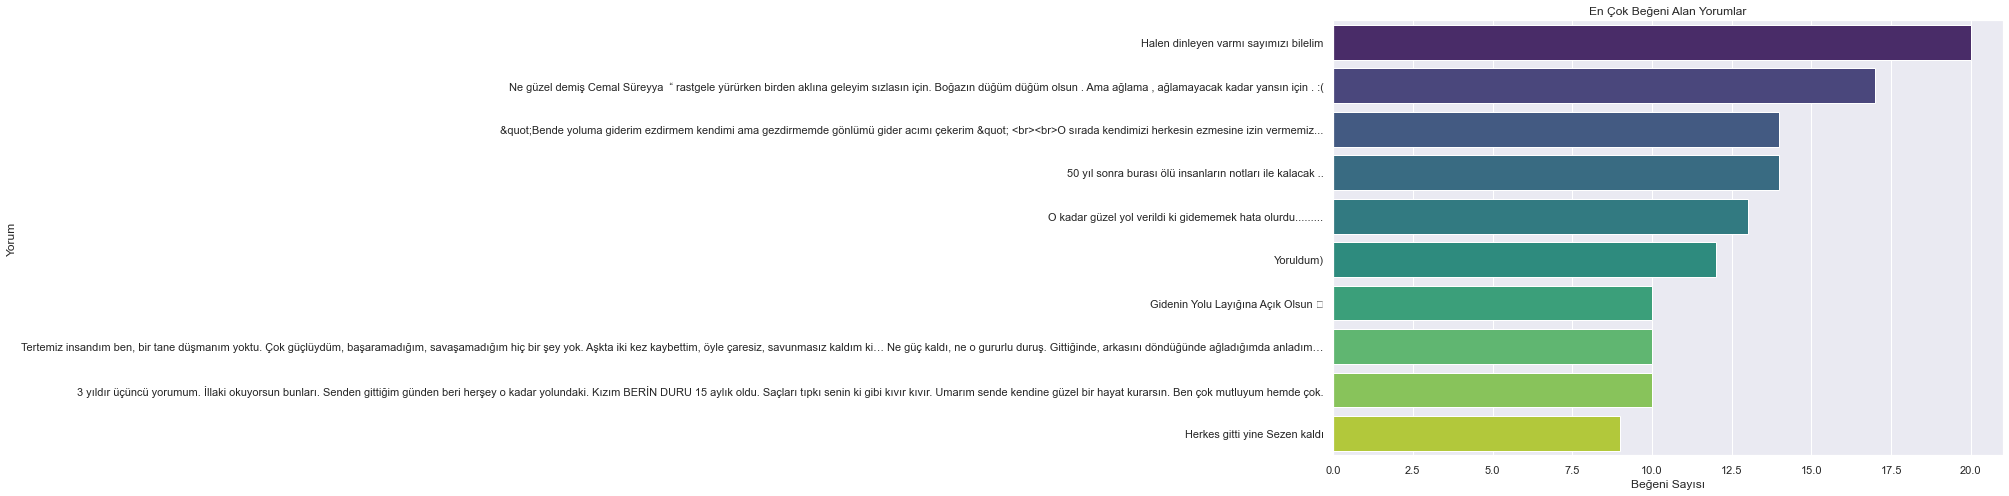

In [152]:
# Yukarƒ±daki csv'yi okuma
df_comments_loaded = pd.read_csv('en_cok_begenilen_yorumlar.csv')

# Beƒüeni sayƒ±sƒ±na g√∂re b√ºy√ºkten k√º√ß√ºƒüe sƒ±ralama
df_comments_loaded = df_comments_loaded.sort_values(by='like_count', ascending=False)

# G√∂rselle≈ütirme
plt.figure(figsize=(12, 8))
sns.barplot(x='like_count', y='text', data=df_comments_loaded.head(10), palette='viridis')
plt.title('En √áok Beƒüeni Alan Yorumlar')
plt.xlabel('Beƒüeni Sayƒ±sƒ±')
plt.ylabel('Yorum')
plt.show()

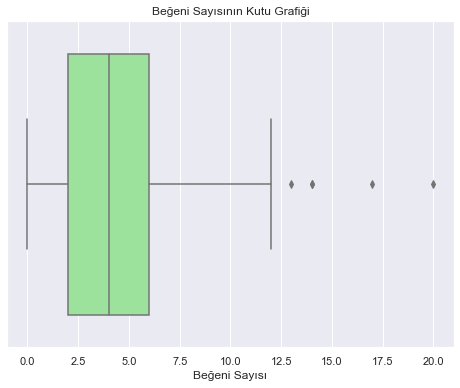

In [153]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_comments_loaded['like_count'], color='lightgreen')
plt.title('Beƒüeni Sayƒ±sƒ±nƒ±n Kutu Grafiƒüi')
plt.xlabel('Beƒüeni Sayƒ±sƒ±')
plt.show()

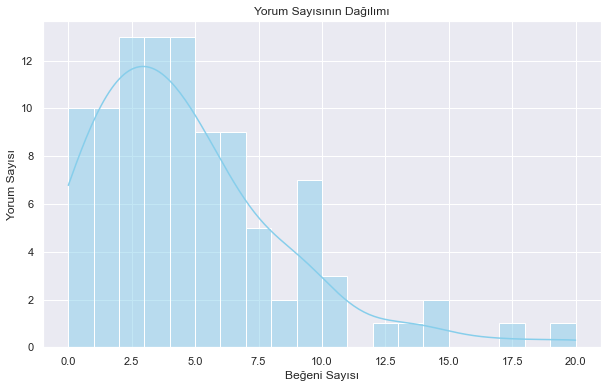

In [154]:
plt.figure(figsize=(10, 6))
sns.histplot(df_comments_loaded['like_count'], bins=20, kde=True, color='skyblue')
plt.title('Yorum Sayƒ±sƒ±nƒ±n Daƒüƒ±lƒ±mƒ±')
plt.xlabel('Beƒüeni Sayƒ±sƒ±')
plt.ylabel('Yorum Sayƒ±sƒ±')
plt.show()